<a href="https://colab.research.google.com/github/brendenwest/cis276/blob/main/7_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Time Series Analysis

### Reading
- Murach's, Chapter 9
- https://wesmckinney.com/book/time-series.html

### Learning Outcomes

- Date & time conversion
- Basic Time Series data
- Date ranges & time periods
- Window Functions

### What is Time Series data

Time series data is an important form of structured data, and can be any data recorded repeatedly at many points in time.

Time series can have `fixed frequency` - data points occurring at regular intervals (e.g. hourly, daily, etc).

Time series can also be `irregular` without a fixed unit of time or offset between units.

Data points typically have a `timestamp` specifying an instant in time. Timestamp can be a `date`, a `time`, or a combination of both.


### Date & Time types

Python has built-in data types & modules for date and time data, such as `datetime`, `time`, & `calendar`.

`datetime` stores both the date and time down to the microsecond. It has numerous methods to create a datetime object from inputs and to output parts of a datetime object.

In [57]:
from datetime import datetime
now = datetime.now()
print("now - ", now)  # show complete datetime object
print("date parts - ", now.year, now.month, now.day)
then = datetime(2023, 4, 12, 13, 9, 16, 484533)
delta = now - then
delta

now -  2024-02-12 01:33:40.462265
date parts -  2024 2 12


datetime.timedelta(days=305, seconds=44663, microseconds=977732)

In [6]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

You can format datetime objects as strings. See docs for a full listing of format codes.

Python `datetime` objects also have locale-specific formatting options for countries & languages other than US English.

In [13]:
timestamp = datetime(2021, 1, 3)
str(timestamp)  # convert datetime to string
timestamp.strftime("%Y-%m-%d")  # timestamp to formatted string

'2021-01-03'

You can use many of the same format codes to convert strings to dates.

In [16]:
datetime.strptime("2021-01-03", "%Y-%m-%d")
datestrs = ["7/6/2021", "8/6/2021"]
[datetime.strptime(x, "%m/%d/%Y") for x in datestrs]

[datetime.datetime(2021, 7, 6, 0, 0), datetime.datetime(2021, 8, 6, 0, 0)]

### Pandas Time Series Basics

The `pandas.to_datetime` method parses many different kinds of date representations, including missing data, into a `DatetimeIndex` Series indexed by datetime objects.

In [38]:
import pandas as pd
datestrs = ["2021/07/06 12:00:00", "2021-08-06 00:00:00", None]
pd.to_datetime(datestrs)

DatetimeIndex(['2021-07-06 12:00:00', '2021-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

A basic pandas time series object is a Series indexed by timestamps. Pandas time series can be sliced like any other Series.

In [39]:
import numpy as np
ts = pd.Series(np.random.standard_normal(3), index=pd.to_datetime(datestrs))
ts

2021-07-06 12:00:00   -0.210091
2021-08-06 00:00:00    0.544252
NaT                   -0.608974
dtype: float64

Scalar values from a DatetimeIndex are pandas `Timestamp` objects and can generally be substituted for a `datetime` object. However, Timestamp objects can store data at nanosecond precision and also store frequency information.

In [40]:
ts.index[0]

Timestamp('2021-07-06 12:00:00')

Time series can also use a date string for indexing and also can slice with timestamps not contained in a time series to perform a range query.

In [41]:
ts['2021-07-06']
ts["2021-01-01":"2021-09-01"]

<ipython-input-41-620f9cb62bd0>:2: FutureWarning: Value based partial slicing on non-monotonic DatetimeIndexes with non-existing keys is deprecated and will raise a KeyError in a future Version.
  ts["2021-01-01":"2021-09-01"]


2021-07-06 12:00:00   -0.210091
2021-08-06 00:00:00    0.544252
dtype: float64

### Date Ranges & Frequencies

Time series analysis often requires working with fixed-frequency data. pandas supports standard time series frequencies and has tools for resampling (conversion), inferring frequencies, and generating fixed-frequency date ranges.

In [45]:
# convert exising time series to fixed daily frequency
resampler = ts.resample("D")
len(resampler)

32

`pandas.date_range` generates a DatetimeIndex with a specified length according to a particular frequency.

Default frequency is daily, but pandas supports a wide set of frequencies including business-specific values. Frequencies that describe unevenly spaced intervals are referred to as `anchored` offsets.

In [50]:
pd.date_range("2021-04-01", "2021-06-01")

DatetimeIndex(['2021-04-01', '2021-04-02', '2021-04-03', '2021-04-04',
               '2021-04-05', '2021-04-06', '2021-04-07', '2021-04-08',
               '2021-04-09', '2021-04-10', '2021-04-11', '2021-04-12',
               '2021-04-13', '2021-04-14', '2021-04-15', '2021-04-16',
               '2021-04-17', '2021-04-18', '2021-04-19', '2021-04-20',
               '2021-04-21', '2021-04-22', '2021-04-23', '2021-04-24',
               '2021-04-25', '2021-04-26', '2021-04-27', '2021-04-28',
               '2021-04-29', '2021-04-30', '2021-05-01', '2021-05-02',
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10',
               '2021-05-11', '2021-05-12', '2021-05-13', '2021-05-14',
               '2021-05-15', '2021-05-16', '2021-05-17', '2021-05-18',
               '2021-05-19', '2021-05-20', '2021-05-21', '2021-05-22',
               '2021-05-23', '2021-05-24', '2021-05-25', '2021-05-26',
      


If you pass only a start or end date, you must pass a number of periods to generate.

In [48]:
pd.date_range(start="2012-04-01", periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

Frequencies in pandas are composed of a `base` frequency and a `multiplier` expressed as a string alias - e.g. 'M' for monthly, "2M" for two months.

Frequency strings can be combined.

In [51]:
pd.date_range("2000-01-01", periods=10, freq="1h30min")

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')


Each base frequency has a corresponding `date offset` object. For example, hourly frequency can be represented with the `Hour` class.

In [56]:
from pandas.tseries.offsets import Hour, Minute

Hour(2) + Minute(30)

<150 * Minutes>

### Time Zone Handling

Time zones handling can be the most challenging part of time series data. To help, data is often stored or translated into coordinated universal time or `UTC`.

Time zones are expressed as offsets from UTC (e.g. Seattle = UTC-7 during daylight saving time (DST) or UTC-8 other times of year).

Python version < 3.9 use the 3rd-party `pytz` library, which encapsulates a comprehensive datbase of worldwide timezones & historical changes. Python 3.9 & later versions have this capability built-in.

In [62]:
import pytz
print(pytz.common_timezones[-5:])
print()
pytz.timezone("America/Los_Angeles")

['US/Eastern', 'US/Hawaii', 'US/Mountain', 'US/Pacific', 'UTC']



<DstTzInfo 'America/Los_Angeles' LMT-1 day, 16:07:00 STD>

By default pandas time series are `time zone naive` (have no time zone), but they can be created with a time zone or converted to `localized`.

Once a time series has been localized to a particular time zone, it can be converted to another time zone.

In [70]:
pd.date_range("2012-03-09 09:30", periods=10, tz="UTC")

ts = pd.date_range("2012-03-09 09:30", periods=10)
ts2 = ts.tz_localize("UTC")
print(ts2)
ts2.tz_convert("US/Pacific")

DatetimeIndex(['2012-03-09 09:30:00+00:00', '2012-03-10 09:30:00+00:00',
               '2012-03-11 09:30:00+00:00', '2012-03-12 09:30:00+00:00',
               '2012-03-13 09:30:00+00:00', '2012-03-14 09:30:00+00:00',
               '2012-03-15 09:30:00+00:00', '2012-03-16 09:30:00+00:00',
               '2012-03-17 09:30:00+00:00', '2012-03-18 09:30:00+00:00'],
              dtype='datetime64[ns, UTC]', freq='D')


DatetimeIndex(['2012-03-09 01:30:00-08:00', '2012-03-10 01:30:00-08:00',
               '2012-03-11 01:30:00-08:00', '2012-03-12 02:30:00-07:00',
               '2012-03-13 02:30:00-07:00', '2012-03-14 02:30:00-07:00',
               '2012-03-15 02:30:00-07:00', '2012-03-16 02:30:00-07:00',
               '2012-03-17 02:30:00-07:00', '2012-03-18 02:30:00-07:00'],
              dtype='datetime64[ns, US/Pacific]', freq='D')

Individual `Timestamp` objects can also be localized from naive to time zone-aware and converted from one time zone to another.

In [73]:
stamp = pd.Timestamp("2011-03-12 04:00")
stamp_utc = stamp.tz_localize("utc")
stamp_utc.tz_convert("America/New_York")

Timestamp('2011-03-11 23:00:00-0500', tz='America/New_York')

### Time Periods

Pandas can represent time spans like days, months, or years with the `pandas.Period` class. Creating a period requires a string or integer and a supported frequency alias.

In [77]:
p = pd.Period("2011", freq="A-DEC") # full time span from January 1 to December 31, 2011, inclusive
p

Period('2011', 'A-DEC')

Adding or subtracting integers from periods shifts their frequency.

In [78]:
p + 5

Period('2016', 'A-DEC')

Ranges of periods can be constructed with the `period_range` function.

In [80]:
pd.period_range("2000-01-01", "2000-06-30", freq="M")

PeriodIndex(['2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06'], dtype='period[M]')

Periods and PeriodIndex objects can be converted to another frequency with their `asfreq` method.

In [81]:
 p.asfreq("M", how="start")

Period('2011-01', 'M')

### Resampling & Conversion

Resampling is the conversion of a time series from one frequency to another. `Downsampling` aggregated higher frequency data to a lower frequency, while `upsampling` converts lower frequency to higher frequency.

### Moving Windows

Time series analysis often involves statistics and other functions evaluated over a `sliding window` or with exponentially decaying weights.

The expression `rolling(120)` is similar to groupby, but creates an object that groups over a 120-day sliding window.

<Axes: >

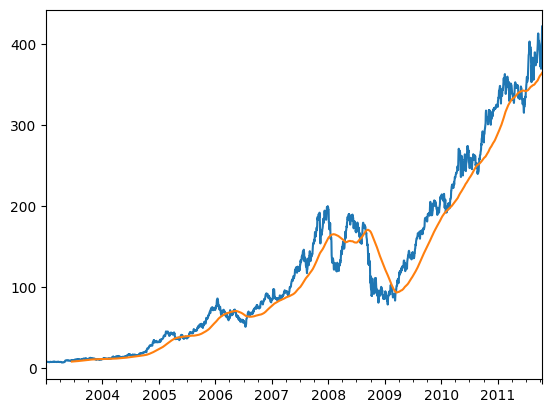

In [92]:
close_px_all = pd.read_csv("https://raw.githubusercontent.com/wesm/pydata-book/3rd-edition/examples/stock_px.csv", parse_dates=True, index_col=0)
close_px = close_px_all[["AAPL", "MSFT", "XOM"]]
close_px = close_px.resample("B").ffill() # resample to business-day frequency
close_px["AAPL"].plot()
close_px["AAPL"].rolling(120).mean().plot() # plot 120-day rolling average